<a href="https://colab.research.google.com/github/Buse-cetin/Topic_Modelling/blob/main/NMF_topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=nltk.corpus.stopwords.words('turkish')
new_stopwords= [ "pkk","merhaba","günler","dedi","pelin","imamoğlu","akp","chp","terör","izmir","iki","ibb","ibbsikayet",'istanbul','gtgtb','imamoğlu','istanbulbld','beyazmasa','belediye','imamoglu','ekrem',"istanbulsikayet",'istanbul_trafik',"istanbultrafik","ibb_ulasim","iett","beyazmasa","ibbulaştırma","ibbbeyazmasa","istanbul","nin","belediye","blk","den","soylu","belediye"] 
stop_words.extend(new_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [22]:
data = pd.read_csv('/content/drive/MyDrive/stop_clean.csv', on_bad_lines='skip')
df=pd.DataFrame(data)
reviews=data[['tweet']]

def clean_text(review):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(review)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text




In [23]:
df['cleaned_review']=df['tweet'].fillna('').apply(clean_text)

In [24]:
print(df['cleaned_review'])

0        dakikadan fazladır taksi dksı görünen otobüsü ...
1        olimpiyat cadde üzeri pendik buraya araç park ...
2        parklarda kontrol bakımları aksatarak canlarla...
3        parklarda kontrol bakımları aksatarak canlarla...
4        bugün taksici terörüne tanık oldumtaksici bagd...
                               ...                        
80279    donuklaşmamamişlar diliten bagetliten eski kur...
80280    zirvede bıraktın isterim aradığın sevgilim sev...
80281    herzaman söylüyoruz takımlarının derdi adalet ...
80282    yaşamalısın olmamana şişli kadarıyla kalsa sul...
80283    gibisi ebedi edebiyat bilimi mecidiyeköy durma...
Name: cleaned_review, Length: 80284, dtype: object


In [36]:
vectorizer = TfidfVectorizer(max_features=100000, min_df=1500, stop_words=stop_words)
X = vectorizer.fit_transform(df['cleaned_review'])
words = np.array(vectorizer.get_feature_names())

In [38]:
nmf = NMF(n_components=9, solver="mu")
W = nmf.fit_transform(X)
H = nmf.components_

for i, topic in enumerate(H):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

Topic 1: ongun,otobüs,zaman,güzel,ulasim,ibbtrafik,saat,taksi,istanbulda,trafik
Topic 2: trafik,ulaşım,otobüs,saat,güzel,zaman,ongun,istanbulda,taksi,ulasim
Topic 3: ulasim,ibbtrafik,ulaşım,güzel,zaman,saat,istanbulda,otobüs,taksi,ongun
Topic 4: taksi,trafik,ibbtrafik,ulaşım,güzel,zaman,ulasim,saat,istanbulda,otobüs
Topic 5: otobüs,trafik,ulasim,ulaşım,zaman,güzel,ibbtrafik,taksi,istanbulda,saat
Topic 6: taksi,trafik,ulaşım,ulasim,otobüs,ongun,güzel,zaman,istanbulda,ibbtrafik
Topic 7: ongun,otobüs,saat,taksi,trafik,ulasim,ulaşım,güzel,istanbulda,zaman
Topic 8: otobüs,saat,trafik,ulasim,zaman,ibbtrafik,güzel,taksi,istanbulda,ulaşım
Topic 9: istanbulda,taksi,ulaşım,zaman,saat,otobüs,ongun,trafik,ulasim,güzel


In [39]:
print(words[topic.argsort()[-20:]])

['ibbtrafik' 'istanbulda' 'taksi' 'ulaşım' 'zaman' 'saat' 'otobüs' 'ongun'
 'trafik' 'ulasim' 'güzel']


In [40]:
topicss=words[topic.argsort()[-20:]]

In [41]:
all_tweets = " ".join(i for i in  topicss)

In [42]:
from sklearn.model_selection import train_test_split

In [31]:
! pip install wordcloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


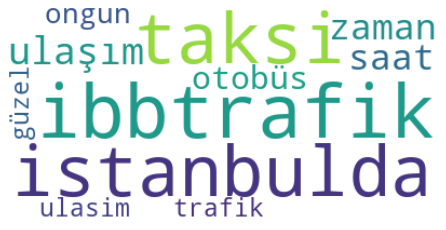

In [43]:
wordcloud = WordCloud(background_color="white").generate(all_tweets)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()